In [ ]:
# data collection and cleaning

import pandas as pd
df = pd.read_csv("cars24_dataset.csv")

# Step 1: Clean column names (safe renaming)
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r'[^\w\s]', '', regex=True)
)

# Step 2: Drop irrelevant or redundant columns
if 'drive' in df.columns and df['drive'].nunique() == 1:
    df.drop(columns=['drive'], inplace=True)  # likely duplicate or useless

# Step 3: Handle missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Strategy: fill numeric with median, categorical with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

# Step 4: Clean categorical inconsistencies (optional improvement)
# Example: Normalize fuel types, transmission labels etc.
df['fuel_type'] = df['fuel_type'].str.upper().str.strip()
df['transmission'] = df['transmission'].str.capitalize().str.strip()
df['spare_key'] = df['spare_key'].str.capitalize().str.strip()

# Step 5: Final check
print("\nFinal dataset shape:", df.shape)
print("Unique values per column:\n", df.nunique())

# Step 6: Save cleaned dataset
df.to_csv("cars24_cleaned.csv", index=False)
print("\n Cleaned dataset saved as 'cars24_cleaned.csv'")


Missing values:
 model_name            0
price                 0
manufacturing_year    0
engine_capacity       0
spare_key             0
transmission          0
km_driven             0
ownership             0
fuel_type             0
imperfections         0
repainted_parts       0
drive                 0
dtype: int64

Final dataset shape: (9460, 12)
Unique values per column:
 model_name             699
price                 1374
manufacturing_year      14
engine_capacity          7
spare_key                2
transmission             2
km_driven             9058
ownership                4
fuel_type                4
imperfections           42
repainted_parts         21
drive                    2
dtype: int64

✅ Cleaned dataset saved as 'cars24_cleaned.csv'


In [ ]:
!pip install pandas numpy seaborn matplotlib missingno

In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.3 MB/s eta 0:00:00


### BASIC INFO ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   model_name          9460 non-null   object
 1   price               9460 non-null   int64 
 2   manufacturing_year  9460 non-null   int64 
 3   engine_capacity     9460 non-null   int64 
 4   spare_key           9460 non-null   object
 5   transmission        9460 non-null   object
 6   km_driven           9460 non-null   int64 
 7   ownership           9460 non-null   int64 
 8   fuel_type           9460 non-null   object
 9   imperfections       9460 non-null   int64 
 10  repainted_parts     9460 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 813.1+ KB
None

### FIRST 5 ROWS ###
          model_name   price  manufacturing_year  engine_capacity spare_key  \
0        Hyundai i20  330000                2012             1197       Yes   
1         Tat

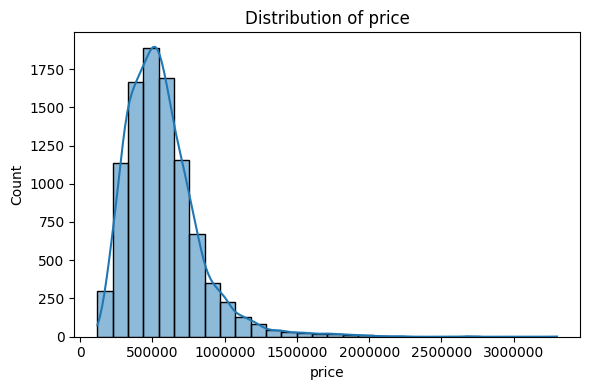

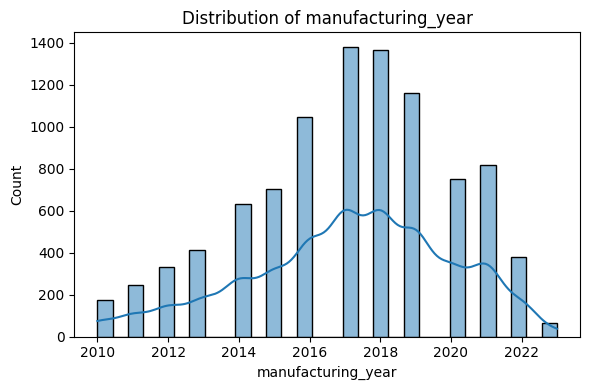

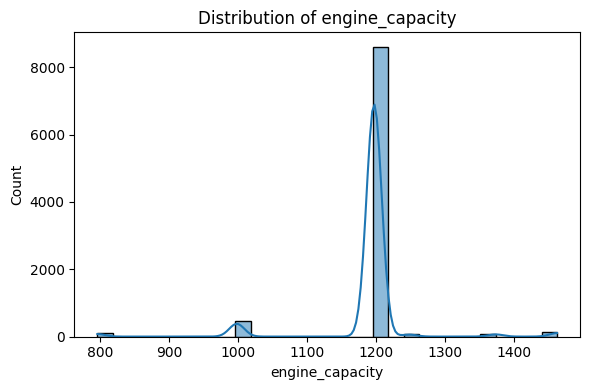

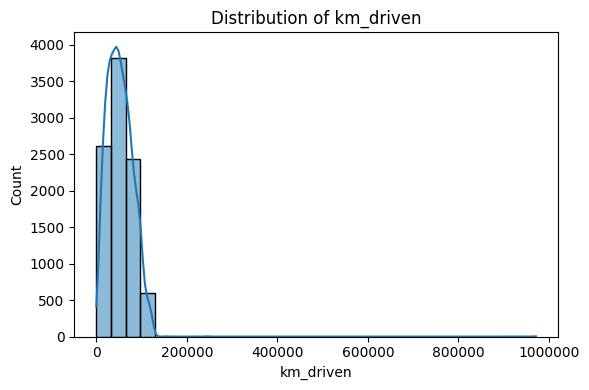

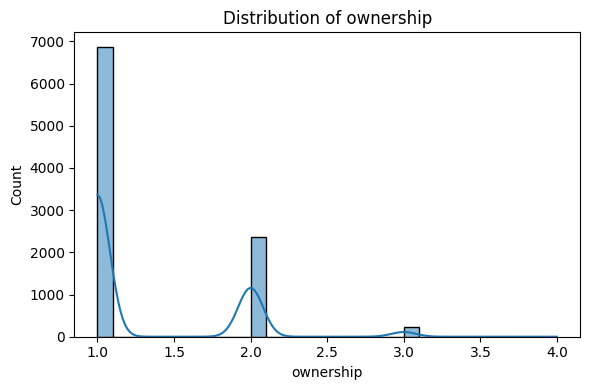

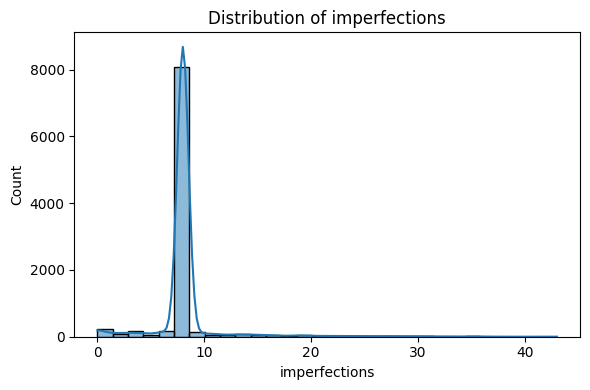

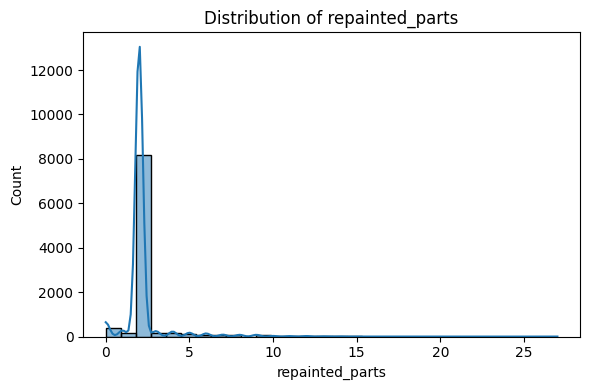

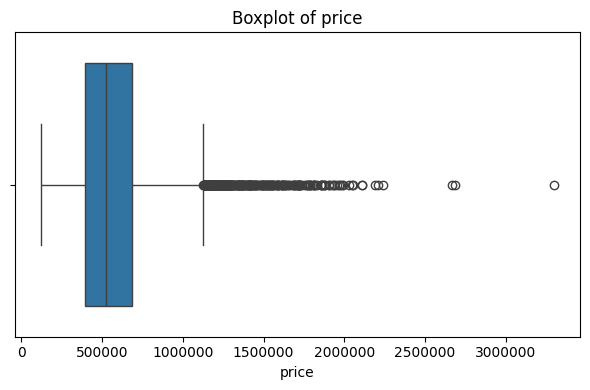

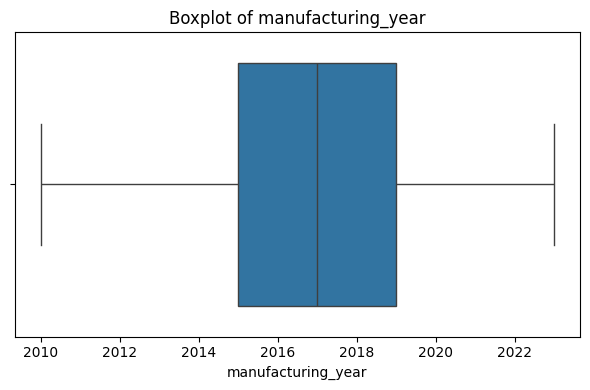

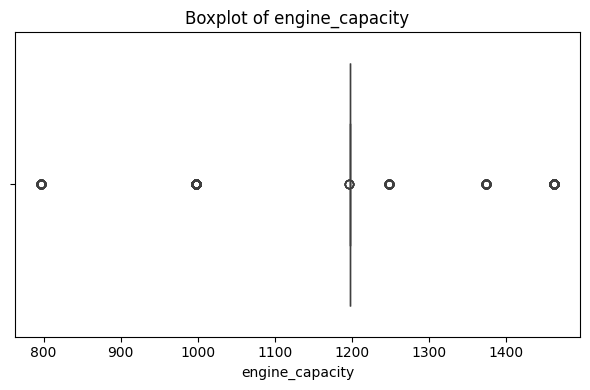

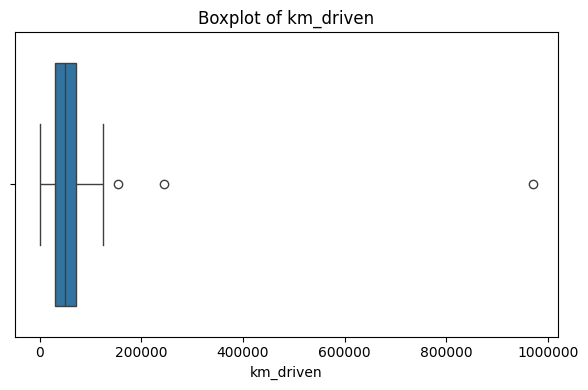

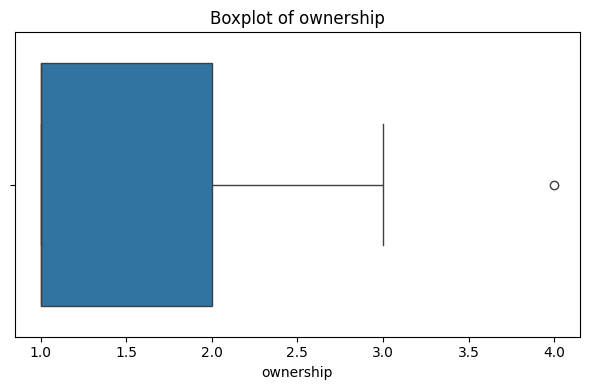

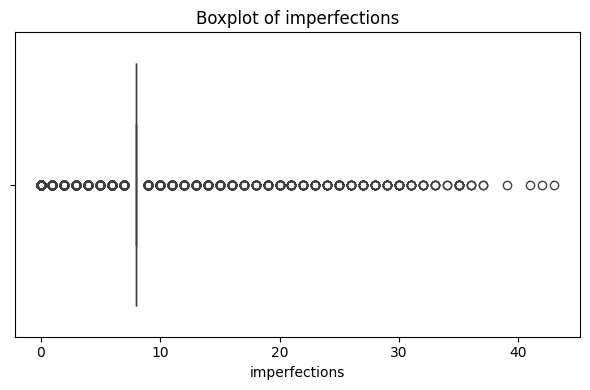

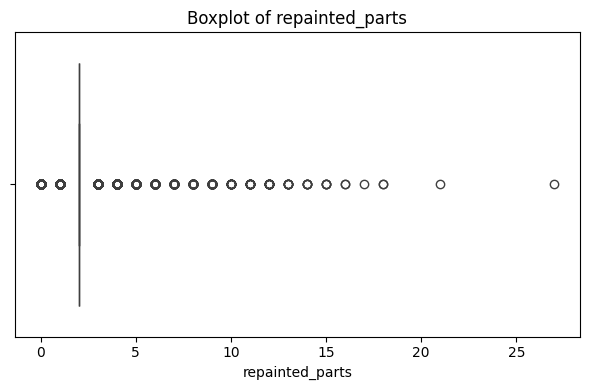

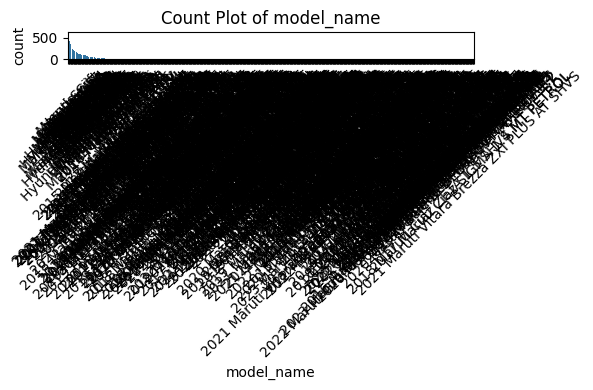

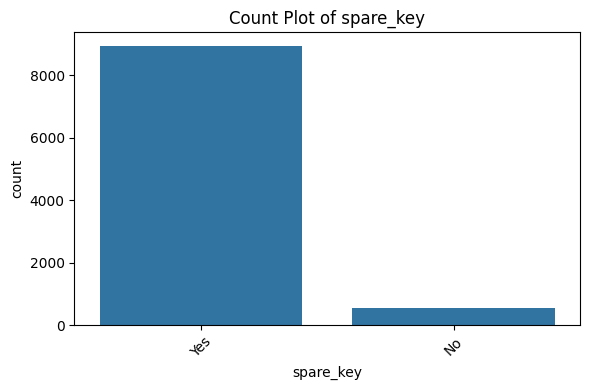

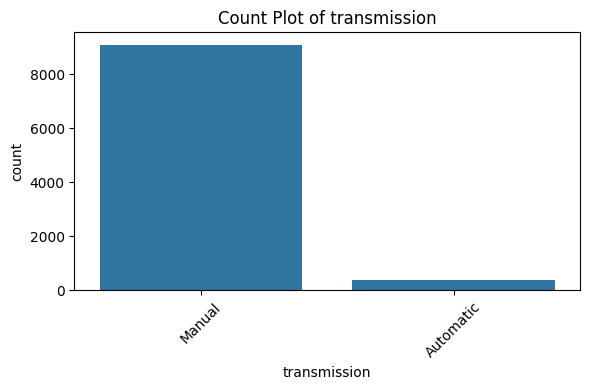

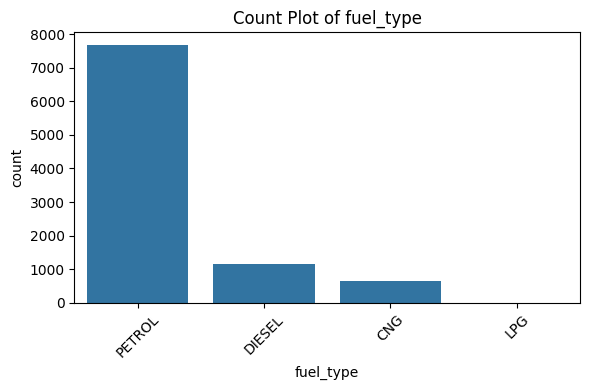

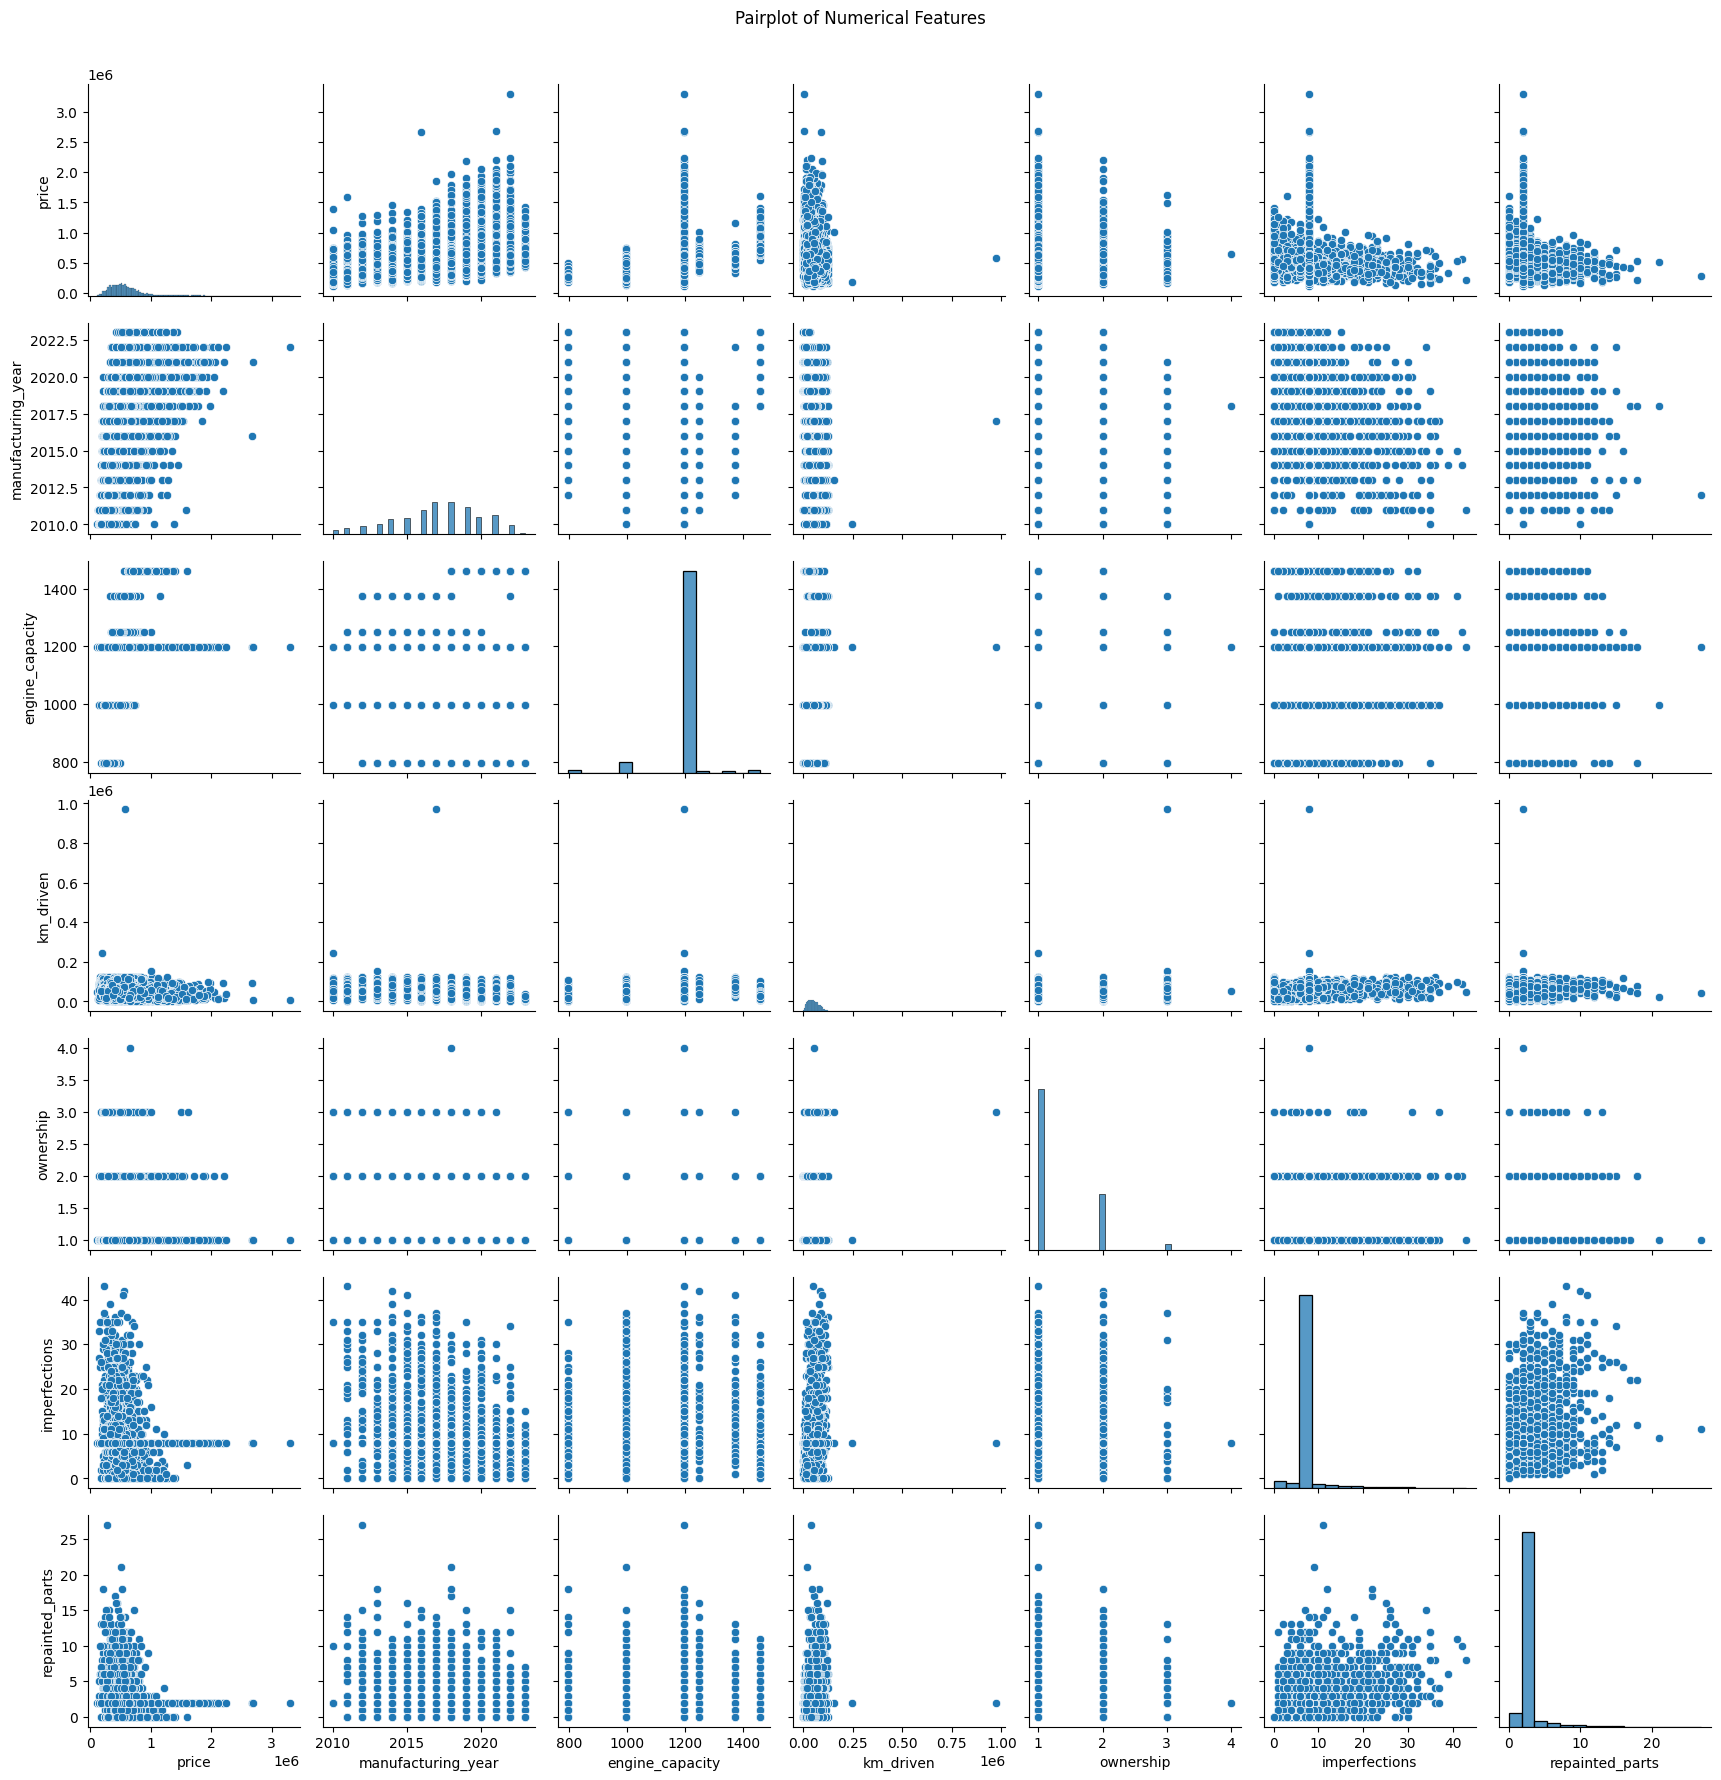

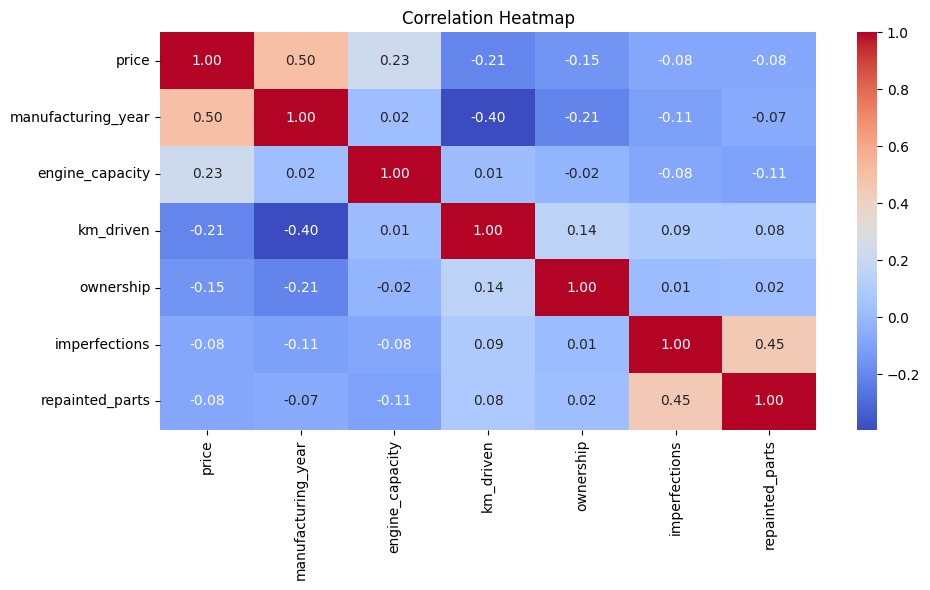

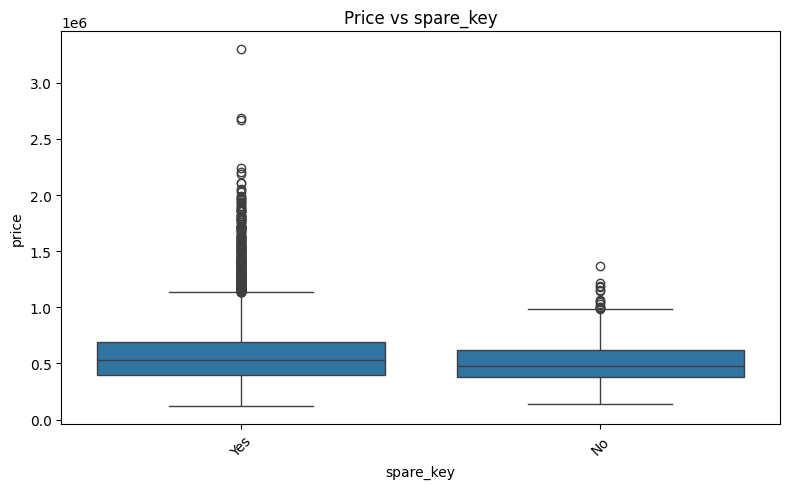

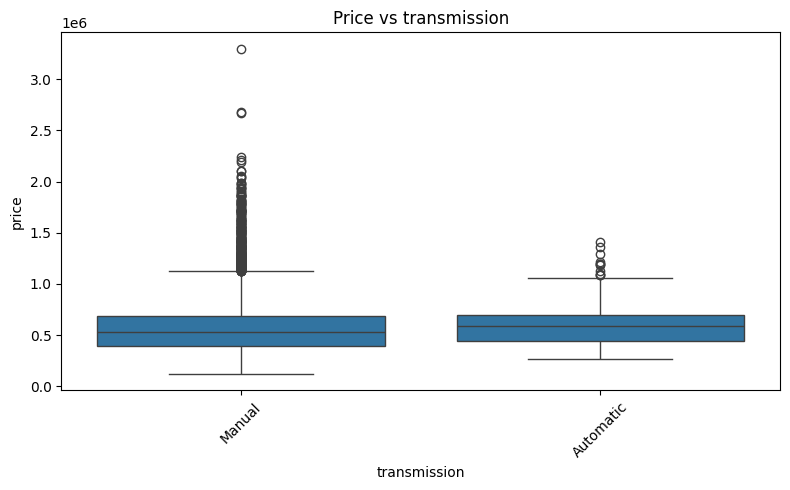

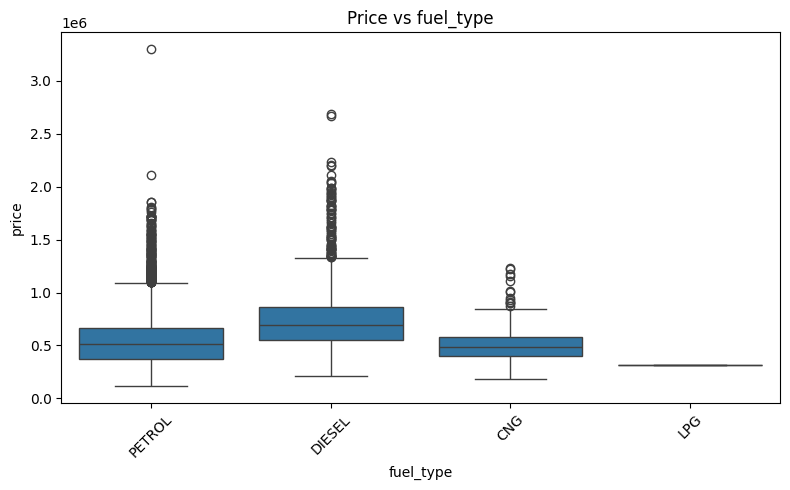

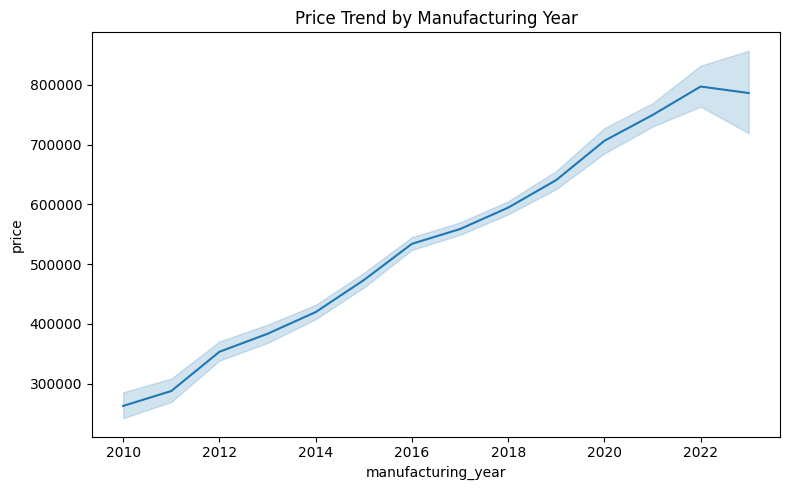

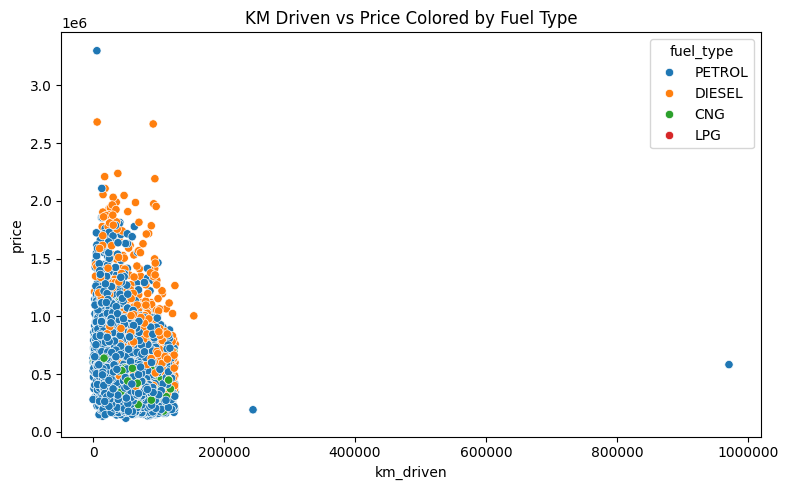

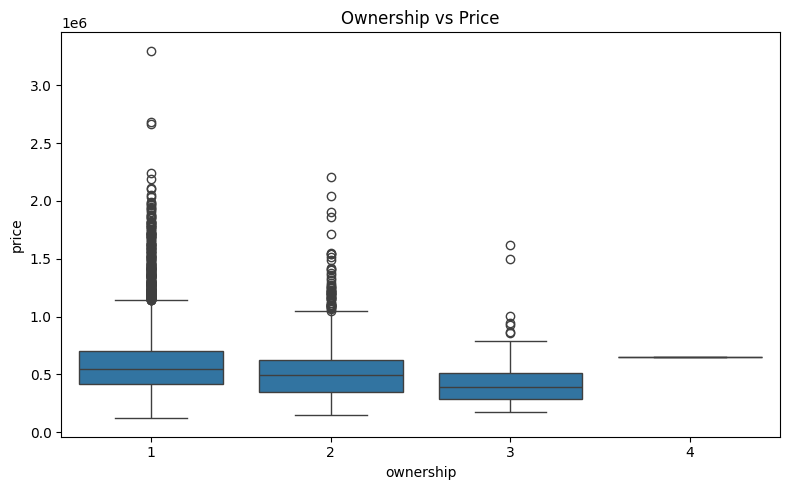

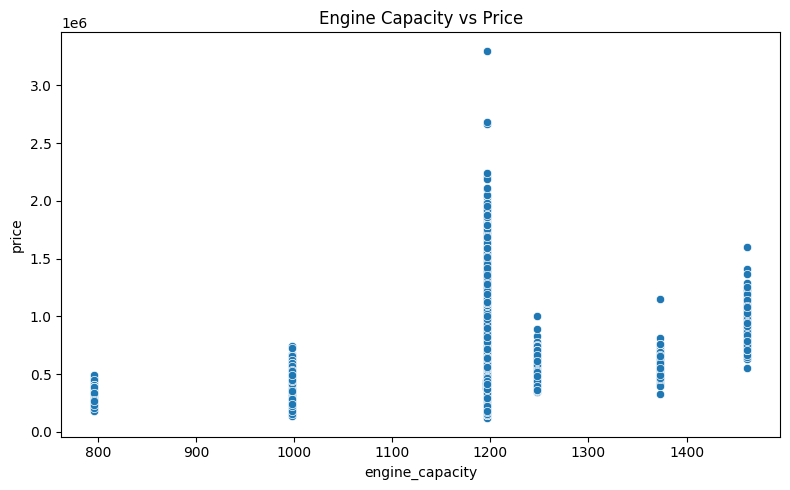

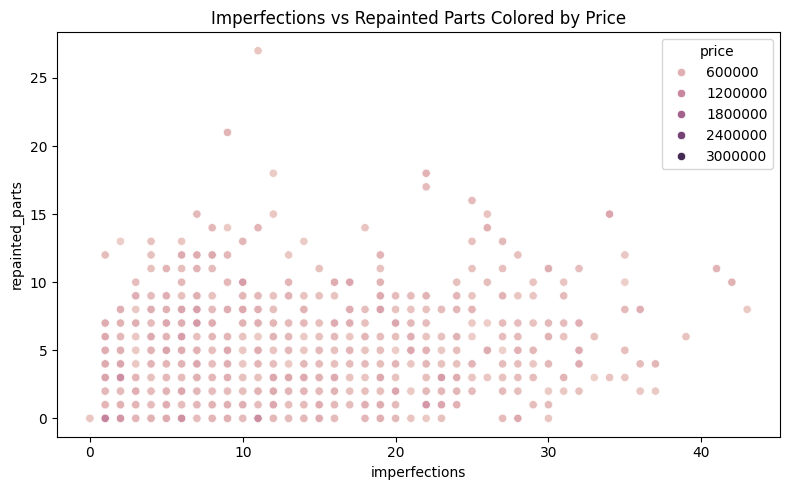

In [ ]:
#eda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.ticker as ticker

# Load data
df = pd.read_csv('cars24_cleaned.csv')

# Basic Info
print("### BASIC INFO ###")
print(df.info())
print("\n### FIRST 5 ROWS ###")
print(df.head())

# Shape
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Column Types
print("\n### COLUMN TYPES ###")
print(df.dtypes)

# Check for missing values
print("\n### MISSING VALUES ###")
print(df.isnull().sum())

# Summary stats
print("\n### SUMMARY STATISTICS ###")
print(df.describe(include='all').transpose())

# Unique values
print("\n### UNIQUE VALUES PER COLUMN ###")
print(df.nunique())

# Value counts for categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    print(f"\n### VALUE COUNTS: {col} ###")
    print(df[col].value_counts())

# Univariate Analysis - Numerical
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
    plt.gca().ticklabel_format(style='plain', axis='x')
    plt.tight_layout()
    plt.show()

# Boxplots to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
    plt.gca().ticklabel_format(style='plain', axis='x')
    plt.tight_layout()
    plt.show()

# Univariate Analysis - Categorical
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {col}")
    plt.tight_layout()
    plt.show()

# Bivariate Analysis: Numerical vs Numerical
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Numerical vs Categorical (e.g., price vs fuel_type)
for col in categorical_cols:
    if col != 'model_name':
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=col, y='price', data=df)
        plt.xticks(rotation=45)
        plt.title(f"Price vs {col}")
        plt.tight_layout()
        plt.show()

# Year-wise average price
plt.figure(figsize=(8, 5))
sns.lineplot(x='manufacturing_year', y='price', data=df)
plt.title("Price Trend by Manufacturing Year")
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# KM driven vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='km_driven', y='price', hue='fuel_type', data=df)
plt.title("KM Driven vs Price Colored by Fuel Type")
plt.xlabel("km_driven")
plt.ylabel("price")
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# Ownership vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(x='ownership', y='price', data=df)
plt.title("Ownership vs Price")
plt.tight_layout()
plt.show()

# Engine capacity vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='engine_capacity', y='price', data=df)
plt.title("Engine Capacity vs Price")
plt.tight_layout()
plt.show()

# Imperfections and repainted parts relation
plt.figure(figsize=(8, 5))
sns.scatterplot(x='imperfections', y='repainted_parts', hue='price', data=df)
plt.title("Imperfections vs Repainted Parts Colored by Price")
plt.tight_layout()
plt.show()


In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install yellowbrick  # For cluster diagnostics, if needed

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, r2_score, classification_report


In [ ]:
# Load Data
df = pd.read_csv("cars24_cleaned.csv")
df.head()

,model_name,price,manufacturing_year,engine_capacity,spare_key,transmission,km_driven,ownership,fuel_type,imperfections,repainted_parts
0,Hyundai i20,330000,2012,1197,Yes,Manual,99813,2,PETROL,8,2
1,Tata Tiago,420000,2018,1197,Yes,Manual,30246,1,DIESEL,8,2
2,Hyundai Grand i10,460000,2014,1197,Yes,Manual,38783,1,PETROL,8,2
3,Skoda Rapid,590000,2018,1197,Yes,Manual,94375,2,PETROL,8,2
4,Maruti Alto,422000,2021,1197,Yes,Manual,34832,1,CNG,8,2


In [ ]:
#data preprocessing

le = LabelEncoder()
for col in ['model_name', 'fuel_type', 'transmission', 'spare_key']:
    df[col] = le.fit_transform(df[col])

# Create simulated "condition score" based on imperfections
df['condition_score'] = pd.cut(
    df['imperfections'],
    bins=[-1, 2, 5, 8, 10, float('inf')],
    labels=[5, 4, 3, 2, 1]
).astype(int)


In [ ]:
#Linear Regression for Price Prediction

# Define features and target
X = df.drop(columns=['price', 'condition_score'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔹 Linear Regression RMSE:", rmse)
print("🔹 R² Score:", r2)


🔹 Linear Regression RMSE: 212450.57220665424
🔹 R² Score: 0.31188975079622916


In [ ]:
#K-Means Clustering (Customer Segmentation)

# Select clustering features
cluster_features = df[['price', 'km_driven', 'engine_capacity', 'ownership', 'imperfections']]

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_features)

# Output cluster counts
print("🔹 Cluster distribution:\n", df['cluster'].value_counts())


🔹 Cluster distribution:
 cluster
2    3900
0    3417
3    1836
1     307
Name: count, dtype: int64


In [ ]:
#Anomaly Detection using Isolation Forest

# Isolation Forest model
iso = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso.fit_predict(cluster_features)  # -1 = anomaly, 1 = normal

# Output anomaly counts
print("🔹 Anomaly detection:\n", df['anomaly'].value_counts())


🔹 Anomaly detection:
 anomaly
 1    9365
-1      95
Name: count, dtype: int64


In [ ]:
#Condition Score Prediction (LogReg & DecisionTree)

In [ ]:
# Features and target for classification
X_cls = df.drop(columns=['price', 'condition_score', 'cluster', 'anomaly'])
y_cls = df['condition_score']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


In [ ]:
#lr
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c, y_train_c)
y_pred_log = log_reg.predict(X_test_c)

print("🔹 Logistic Regression Report:\n")
print(classification_report(y_test_c, y_pred_log))


🔹 Logistic Regression Report:

              precision    recall  f1-score   support

           1       0.79      0.90      0.84        99
           2       0.00      0.00      0.00        18
           3       0.95      0.99      0.97      1664
           4       0.67      0.25      0.36        48
           5       0.50      0.30      0.38        63

    accuracy                           0.93      1892
   macro avg       0.58      0.49      0.51      1892
weighted avg       0.91      0.93      0.92      1892



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
#dt

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_c, y_train_c)
y_pred_dt = dt.predict(X_test_c)

print("🔹 Decision Tree Report:\n")
print(classification_report(y_test_c, y_pred_dt))


🔹 Decision Tree Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00      1664
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        63

    accuracy                           1.00      1892
   macro avg       1.00      1.00      1.00      1892
weighted avg       1.00      1.00      1.00      1892



<ipython-input-18-944df554e3a4>:35: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-944df554e3a4>:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-944df554e3a4>:35: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-944df554e3a4>:35: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-p

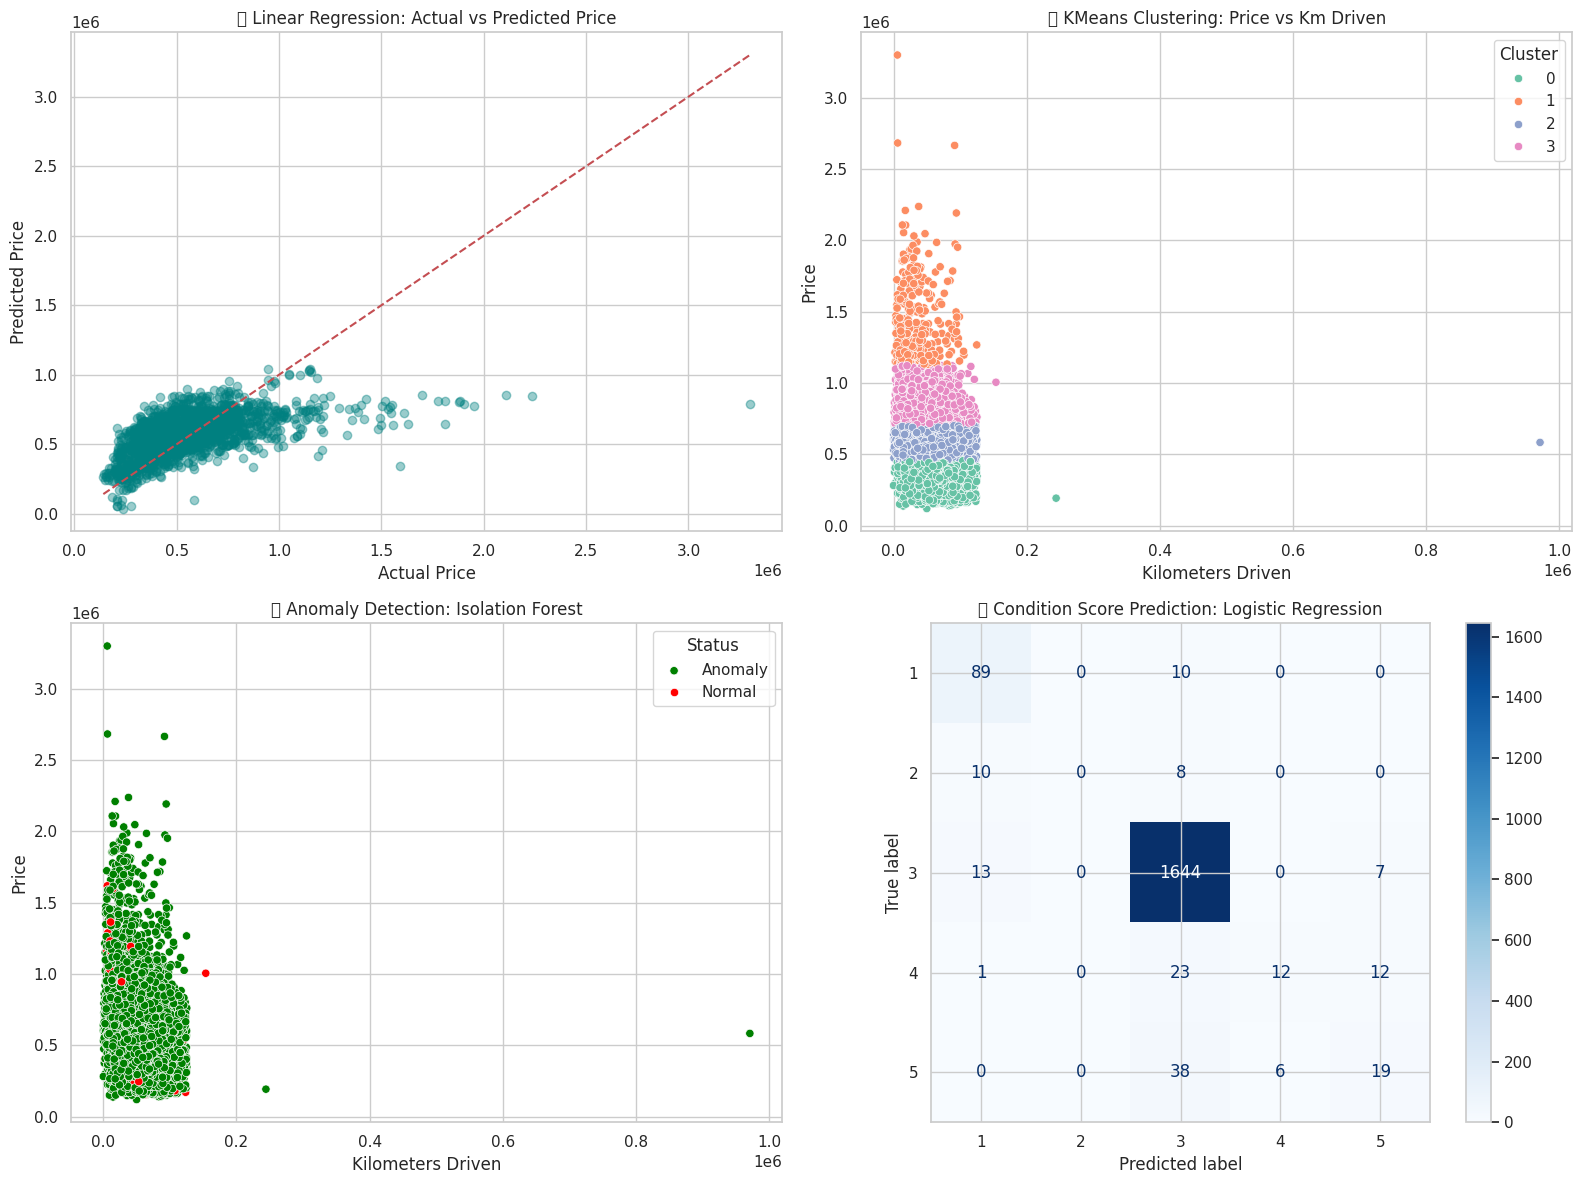

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. 🔍 Linear Regression: Actual vs Predicted
axs[0, 0].scatter(y_test, y_pred, alpha=0.4, color='teal')
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[0, 0].set_xlabel('Actual Price')
axs[0, 0].set_ylabel('Predicted Price')
axs[0, 0].set_title('🔍 Linear Regression: Actual vs Predicted Price')

# 2. 📊 KMeans Clustering: Price vs Km Driven
sns.scatterplot(data=df, x='km_driven', y='price', hue='cluster', palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('📊 KMeans Clustering: Price vs Km Driven')
axs[0, 1].set_xlabel('Kilometers Driven')
axs[0, 1].set_ylabel('Price')
axs[0, 1].legend(title='Cluster')

# 3. 🚨 Anomaly Detection: Price vs Km Driven
sns.scatterplot(data=df, x='km_driven', y='price', hue='anomaly', palette={1: 'green', -1: 'red'}, ax=axs[1, 0])
axs[1, 0].set_title('🚨 Anomaly Detection: Isolation Forest')
axs[1, 0].set_xlabel('Kilometers Driven')
axs[1, 0].set_ylabel('Price')
axs[1, 0].legend(title='Status', labels=['Anomaly', 'Normal'])

# 4. 🧠 Confusion Matrix: Condition Score Classification
cm = confusion_matrix(y_test_c, y_pred_log, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(ax=axs[1, 1], cmap='Blues', values_format='d')
axs[1, 1].set_title("🧠 Condition Score Prediction: Logistic Regression")

plt.tight_layout()
plt.show()


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

st.set_page_config(page_title="Used Car Market Analysis", layout="centered")
st.title("🚗 Used Car Market Analyzer")

st.markdown("""
Use this app to:
- Predict **resale price** of a used car
- Predict **condition score** based on features
- Identify customer segment (cluster)
- Detect if the car listing is an anomaly
""")

st.header("🔧 Enter Car Features")
year = st.number_input("Manufacturing Year", min_value=2000, max_value=2025, step=1)
km_driven = st.number_input("Kilometers Driven", min_value=0)
engine_capacity = st.number_input("Engine Capacity (cc)", min_value=500)
ownership = st.selectbox("Ownership Count", [1, 2, 3, 4])
fuel_type = st.selectbox("Fuel Type (Encoded)", [0, 1, 2, 3], format_func=lambda x: ['CNG', 'Diesel', 'LPG', 'Petrol'][x])
transmission = st.selectbox("Transmission (Encoded)", [0, 1], format_func=lambda x: ['Automatic', 'Manual'][x])
imperfections = st.slider("Number of Imperfections", 0, 10, 3)

# Dummy training for deployment - use actual trained model in production
def train_models():
    # Simulated dataset
    from sklearn.datasets import make_regression
    X, y = make_regression(n_samples=500, n_features=7, noise=0.2)
    lr = LinearRegression().fit(X, y)
    log_reg = LogisticRegression(max_iter=1000).fit((X > X.mean()).astype(int), (y > y.mean()).astype(int))
    kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
    iso = IsolationForest(contamination=0.01, random_state=42).fit(X)
    return lr, log_reg, kmeans, iso

lr_model, log_reg_model, kmeans_model, iso_model = train_models()

# Button to predict
if st.button("📈 Predict All"):
    features = np.array([[year, km_driven, engine_capacity, ownership, fuel_type, transmission, imperfections]])

    # Price Prediction
    predicted_price = lr_model.predict(features)[0]
    st.success(f"💰 Estimated Resale Price: ₹{int(predicted_price):,}")

    # Condition Score Prediction
    condition_score = log_reg_model.predict((features > features.mean()).astype(int))[0]
    st.info(f"🧠 Predicted Condition Score (simulated): {condition_score} / 1")

    # Cluster Prediction
    cluster = kmeans_model.predict(features)[0]
    st.write(f"🔍 Customer Segment (Cluster): {cluster}")

    # Anomaly Detection
    anomaly = iso_model.predict(features)[0]
    if anomaly == -1:
        st.error("⚠️ This car listing is flagged as an anomaly.")
    else:
        st.success("✅ This car listing appears normal.")


2025-04-16 09:14:51.416 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 09:14:51.418 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 09:14:51.648 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-16 09:14:51.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 09:14:51.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 09:14:51.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 09:14:51.657 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [ ]:
!pip install ngrok
!pip install pyngrok

In [ ]:
%%writefile app.py
# Paste your full app code here
import streamlit as st
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

st.set_page_config(page_title="Used Car Market Analysis", layout="centered")
st.title("🚗 Used Car Market Analyzer")

st.markdown("""
Use this app to:
- Predict **resale price** of a used car
- Predict **condition score** based on features
- Identify customer segment (cluster)
- Detect if the car listing is an anomaly
""")

st.header("🔧 Enter Car Features")
year = st.number_input("Manufacturing Year", min_value=2000, max_value=2025, step=1)
km_driven = st.number_input("Kilometers Driven", min_value=0)
engine_capacity = st.number_input("Engine Capacity (cc)", min_value=500)
ownership = st.selectbox("Ownership Count", [1, 2, 3, 4])
fuel_type = st.selectbox("Fuel Type (Encoded)", [0, 1, 2, 3], format_func=lambda x: ['CNG', 'Diesel', 'LPG', 'Petrol'][x])
transmission = st.selectbox("Transmission (Encoded)", [0, 1], format_func=lambda x: ['Automatic', 'Manual'][x])
imperfections = st.slider("Number of Imperfections", 0, 10, 3)

# Dummy training for deployment - use actual trained model in production
def train_models():
    # Simulated dataset
    from sklearn.datasets import make_regression
    X, y = make_regression(n_samples=500, n_features=7, noise=0.2)
    lr = LinearRegression().fit(X, y)
    log_reg = LogisticRegression(max_iter=1000).fit((X > X.mean()).astype(int), (y > y.mean()).astype(int))
    kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
    iso = IsolationForest(contamination=0.01, random_state=42).fit(X)
    return lr, log_reg, kmeans, iso

lr_model, log_reg_model, kmeans_model, iso_model = train_models()

# Button to predict
if st.button("📈 Predict All"):
    features = np.array([[year, km_driven, engine_capacity, ownership, fuel_type, transmission, imperfections]])

    # Price Prediction
    predicted_price = lr_model.predict(features)[0]
    st.success(f"💰 Estimated Resale Price: ₹{int(predicted_price):,}")

    # Condition Score Prediction
    condition_score = log_reg_model.predict((features > features.mean()).astype(int))[0]
    st.info(f"🧠 Predicted Condition Score (simulated): {condition_score} / 1")

    # Cluster Prediction
    cluster = kmeans_model.predict(features)[0]
    st.write(f"🔍 Customer Segment (Cluster): {cluster}")

    # Anomaly Detection
    anomaly = iso_model.predict(features)[0]
    if anomaly == -1:
        st.error("⚠️ This car listing is flagged as an anomaly.")
    else:
        st.success("✅ This car listing appears normal.")


Writing app.py


In [ ]:
!ngrok config add-authtoken 2vnyWTwZ8VmLLwPddbK5SCIwJr6_3iUExXpiLUvuHzZmMpar1

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import time
from pyngrok import ngrok

# Kill previous if running
!pkill streamlit

# Run the app
!streamlit run app.py &

# Wait a few seconds
time.sleep(5)

# Open tunnel
public_url = ngrok.connect(8501)
print("🌐 Public URL:", public_url)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.95.130:8501

  Stopping...
🌐 Public URL: NgrokTunnel: "https://d5fe-34-138-95-130.ngrok-free.app" -> "http://localhost:8501"
